In [22]:
#importe as bibliotecas
from suaBibSignal import *
import numpy as np
import sounddevice as sd
import soundfile as sf
import matplotlib.pyplot as plt
from math import pi
import scipy
import time

signal = signalMeu()
fs = 44100
sd.default.samplerate = fs
sd.default.channels = 1

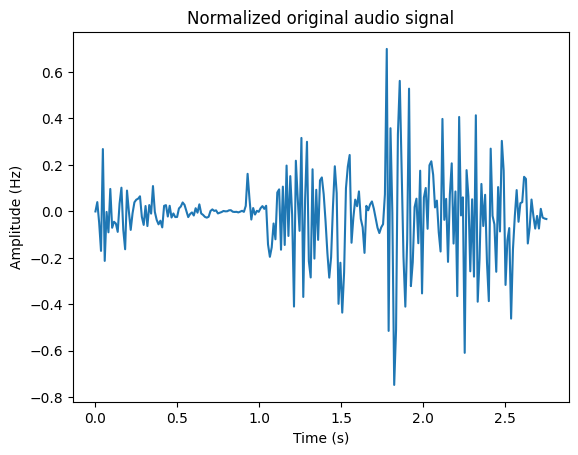

In [23]:
audio, samplerate = sf.read('mario.wav')
y_audio = audio[:,1]
samples_audio = len(y_audio)
total_time = samples_audio/fs
t_domain = np.linspace(0, total_time, samples_audio)
normalized_audio = y_audio/np.max(np.abs(y_audio))

plt.figure()
plt.plot(t_domain[::500], normalized_audio[::500])
plt.title('Normalized original audio signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (Hz)')
plt.show()

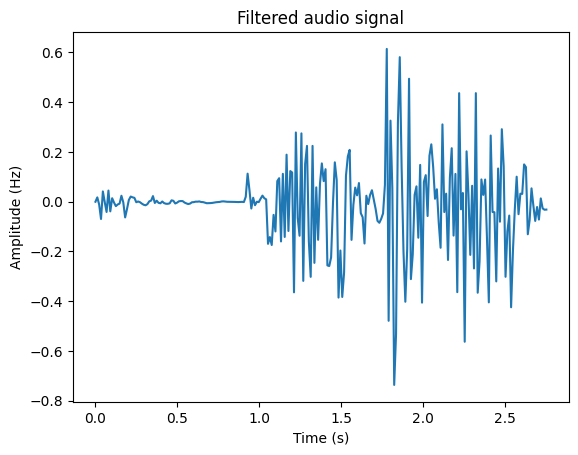

In [24]:
# idea extracted from: https://stackoverflow.com/questions/21862777/bandpass-butterworth-filter-frequencies-in-scipy
b, a = scipy.signal.butter(4, 2200, 'lowpass', fs=samplerate)
filtered_audio = scipy.signal.filtfilt(b, a, normalized_audio)
plt.figure()
plt.plot(t_domain[::500], filtered_audio[::500])
plt.title('Filtered audio signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (Hz)')
plt.show()

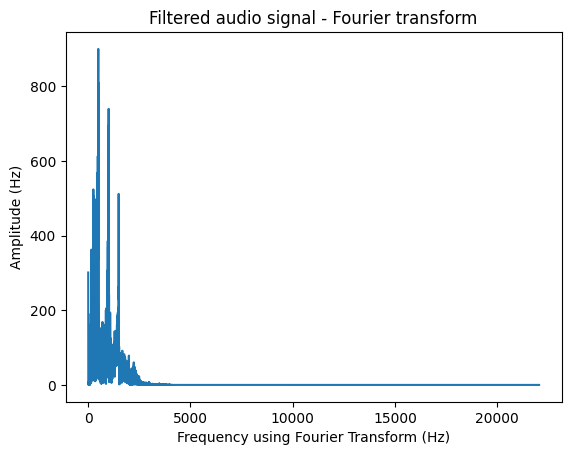

In [25]:
axis_x, axis_y = signal.calcFFT(filtered_audio, fs)

plt.figure()
plt.plot(axis_x, np.abs(axis_y))
plt.title('Filtered audio signal - Fourier transform')
plt.xlabel('Frequency using Fourier Transform (Hz)')
plt.ylabel('Amplitude (Hz)')
plt.show()

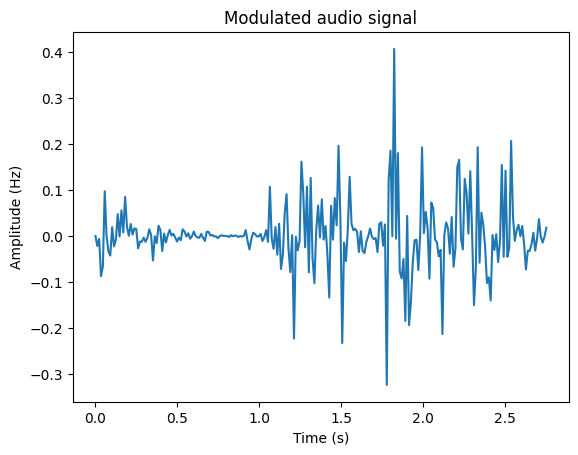

In [26]:
A = 1
f_portadora = 14000
w = 2*pi*f_portadora # omega value
sinwave = A*np.sin(w*t_domain) # math.sin doesnot work for arrays
modulated_audio = sinwave*y_audio
plt.figure()
plt.plot(t_domain[::500], modulated_audio[::500])
plt.title('Modulated audio signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (Hz)')
plt.show()

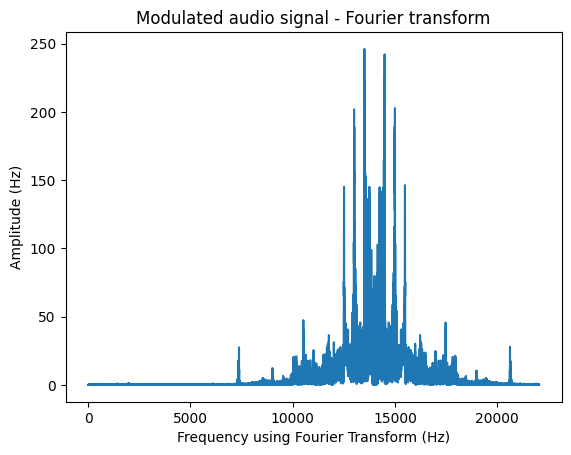

In [27]:
axis_x, axis_y = signal.calcFFT(modulated_audio, fs)

plt.figure()
plt.plot(axis_x, np.abs(axis_y))
plt.title('Modulated audio signal - Fourier transform')
plt.xlabel('Frequency using Fourier Transform (Hz)')
plt.ylabel('Amplitude (Hz)')
plt.show()

In [28]:
sd.play(filtered_audio, fs)
sd.wait()

print('Playing normalized audio...')
sd.play(normalized_audio, fs)
print('...End of audio')

time.sleep(3) # wait 3 seconds

print('Playing modulated audio...')
sd.play(modulated_audio, fs)
print('...End of audio')

sd.wait()
sf.write('modulated_audio.wav', modulated_audio, fs)

Playing normalized audio...
...End of audio
Playing modulated audio...
...End of audio
